In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, dim, init_type='gaussian', init_mean=0.0, init_std=1.0, init_range=(-5, 5)):
        if init_type == 'gaussian':
            self.position = np.random.normal(loc=init_mean, scale=init_std, size=dim)
            self.velocity = np.random.normal(loc=init_mean, scale=init_std, size=dim)
        elif init_type == 'uniform':
            self.position = np.random.uniform(low=init_range[0], high=init_range[1], size=dim)
            self.velocity = np.random.uniform(low=init_range[0], high=init_range[1], size=dim)
        else:
            raise ValueError("Invalid initialization type. Use 'gaussian' or 'uniform'.")

        self.best_position = self.position.copy()
        self.best_score = float('inf')

def ackley(xx, a=20, b=0.2, c=2*np.pi):
    d = len(xx)
    sum1 = np.sum(xx**2)
    sum2 = np.sum(np.cos(c * xx))
    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)
    y = term1 + term2 + a + np.exp(1)
    return y

def pso(objective_function, num_particles, max_iterations, dim, init_type='gaussian', init_mean=0.0, init_std=1.0, init_range=(-5, 5), plot=True):
    particles = [Particle(dim, init_type, init_mean, init_std, init_range) for _ in range(num_particles)]
    global_best_position = np.random.normal(loc=init_mean, scale=init_std, size=dim)
    global_best_score = float('inf')
    fitness_history = []

    for _ in range(max_iterations):
        for particle in particles:
            inertia_weight = 0.5
            cognitive_weight = 1.5
            social_weight = 1.5
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            particle.velocity = (inertia_weight * particle.velocity +
                                 cognitive_weight * r1 * (particle.best_position - particle.position) +
                                 social_weight * r2 * (global_best_position - particle.position))
            particle.position += particle.velocity

            score = objective_function(particle.position)

            if score < particle.best_score:
                particle.best_position = particle.position.copy()
                particle.best_score = score

            if score < global_best_score:
                global_best_position = particle.best_position.copy()
                global_best_score = score

        fitness_history.append(global_best_score)

    if plot:
        plt.plot(fitness_history)
        plt.title("Convergence Curve")
        plt.xlabel("Iteration")
        plt.ylabel("Fitness")
        plt.show()

    return global_best_position, global_best_score



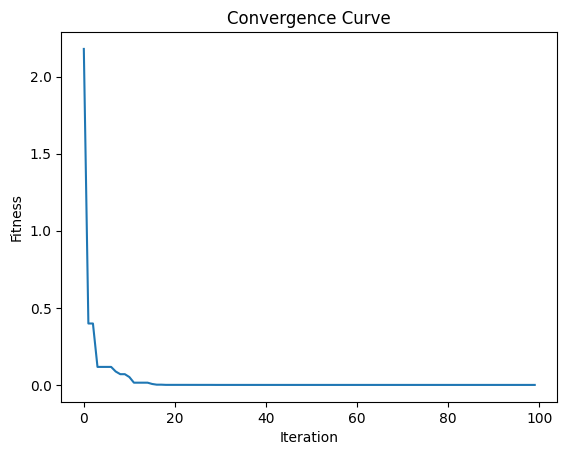

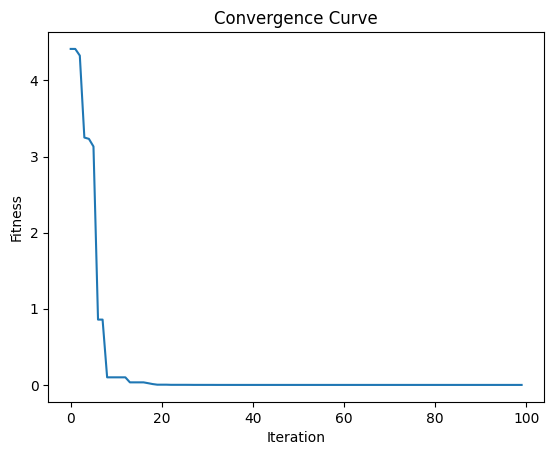

Gaussian Initialization - Best position: [-5.60555729e-14  2.19252265e-14]
Gaussian Initialization - Best score: 1.709743457922741e-13
Uniform Initialization - Best position: [-1.82583581e-12 -4.02255832e-14]
Uniform Initialization - Best score: 5.1660897781857784e-12


In [4]:
# Define parameters
num_particles = 30
max_iterations = 100
dim = 2

# Run PSO with Gaussian initialization
best_position_gaussian, best_score_gaussian = pso(ackley, num_particles, max_iterations, dim, init_type='gaussian', plot=True)

# Run PSO with Uniform initialization
best_position_uniform, best_score_uniform = pso(ackley, num_particles, max_iterations, dim, init_type='uniform', init_range=(-10, 10), plot=True)

# Print results
print("Gaussian Initialization - Best position:", best_position_gaussian)
print("Gaussian Initialization - Best score:", best_score_gaussian)
print("Uniform Initialization - Best position:", best_position_uniform)
print("Uniform Initialization - Best score:", best_score_uniform)
